In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot



Feature Values:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


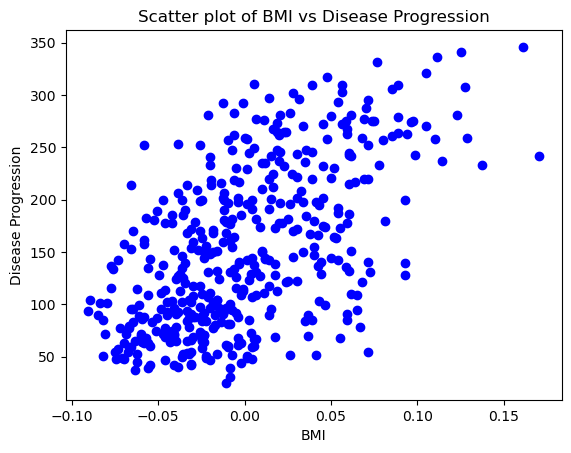

Model Parameters:
Slope (Coefficient): 998.5776891375593
Intercept: 152.00335421448167

Training Set Results:
Mean squared error: 3854.11265207582
Root mean squared error: 62.081500079136454
R-squared: 0.3657241273794126

Test Set Results:
Mean squared error: 4061.8259284949268
Root mean squared error: 63.73245584860925
R-squared: 0.23335039815872138


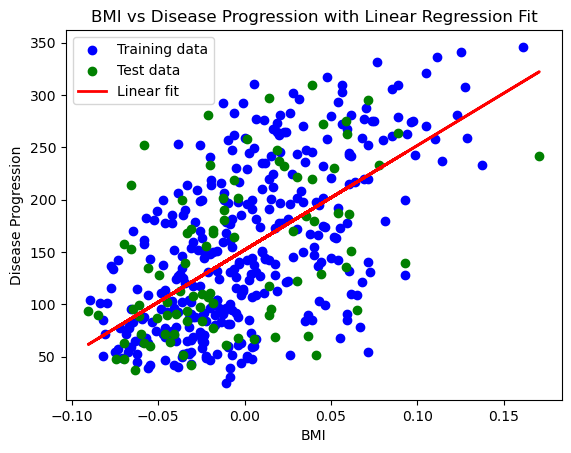

In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

feature_names = datasets.load_diabetes().feature_names
diabetes_df = pd.DataFrame(data=diabetes_X, columns=feature_names)

diabetes_df['target'] = diabetes_y

print("\nFeature Values:\n", diabetes_df.head())

diabetes_X_bmi = diabetes_X[:, np.newaxis, 2]

plt.scatter(diabetes_X_bmi, diabetes_y, color='blue')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatter plot of BMI vs Disease Progression')
plt.show()

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X_bmi, diabetes_y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred_train = model.predict(diabetes_X_train)
diabetes_y_pred = model.predict(diabetes_X_test)

mse_train = mean_squared_error(diabetes_y_train, diabetes_y_pred_train)
mse_test = mean_squared_error(diabetes_y_test, diabetes_y_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(diabetes_y_train, diabetes_y_pred_train)
r2_test = r2_score(diabetes_y_test, diabetes_y_pred)

print('Model Parameters:')
print('Slope (Coefficient):', model.coef_[0])
print('Intercept:', model.intercept_)

print('\nTraining Set Results:')
print('Mean squared error:', mse_train)
print('Root mean squared error:', rmse_train)
print('R-squared:', r2_train)

print('\nTest Set Results:')
print('Mean squared error:', mse_test)
print('Root mean squared error:', rmse_test)
print('R-squared:', r2_test)

plt.scatter(diabetes_X_train, diabetes_y_train, color='blue', label='Training data')
plt.scatter(diabetes_X_test, diabetes_y_test, color='green', label='Test data')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=2, label='Linear fit')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('BMI vs Disease Progression with Linear Regression Fit')
plt.legend()
plt.show()
